# Glass Classification - Adaboost / Gradient Boosting / KNN

https://www.kaggle.com/datasets/uciml/glass

### Import libraries

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
%matplotlib inline

### Import Database

In [2]:
glass = pd.read_csv('glass.csv')

In [3]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### Exploratory Analysis

In [ ]:
profile = ProfileReport(glass, title = 'Glass Classification',correlations = None, interactions = None, html = {'style':{'full_width' : True}})
profile.to_notebook_iframe()

### Define Features and Target

In [5]:
target = ['Type']
features = [x for x in glass.columns if x not in target]

### Split train/test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(glass[features], glass[target], test_size=0.3, random_state=42)

### Adaboost

In [7]:
abc_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)

In [8]:
abc_model.fit(X_train, y_train.values.ravel())

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

In [9]:
y_pred = abc_model.predict(X_test)

In [10]:
print('Adaboost Model metrics')
print('accuracy_score:  ', accuracy_score(y_pred=y_pred,y_true=y_test.values.ravel()))
print(classification_report(y_test,y_pred,zero_division=True))

Adaboost Model metrics
accuracy_score:   0.7230769230769231
              precision    recall  f1-score   support

           1       0.92      0.58      0.71        19
           2       0.58      0.96      0.72        23
           3       1.00      0.00      0.00         4
           5       1.00      0.33      0.50         6
           6       0.75      1.00      0.86         3
           7       1.00      0.90      0.95        10

    accuracy                           0.72        65
   macro avg       0.87      0.63      0.62        65
weighted avg       0.82      0.72      0.69        65



## Gradient Boosting

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
gbc_model = GradientBoostingClassifier(learning_rate=0.1)
gbc_model.fit(X_train,y_train.values.ravel())

GradientBoostingClassifier()

In [13]:
y_pred2 = gbc_model.predict(X_test)

In [14]:
print('Gradient Boosting Model metrics')
print('accuracy_score:  ', accuracy_score(y_pred=y_pred2,y_true=y_test.values.ravel()))
print(classification_report(y_test,y_pred2))

Gradient Boosting Model metrics
accuracy_score:   0.7846153846153846
              precision    recall  f1-score   support

           1       0.69      0.95      0.80        19
           2       0.76      0.70      0.73        23
           3       1.00      0.50      0.67         4
           5       1.00      0.50      0.67         6
           6       0.67      0.67      0.67         3
           7       1.00      1.00      1.00        10

    accuracy                           0.78        65
   macro avg       0.85      0.72      0.75        65
weighted avg       0.81      0.78      0.78        65



## Gradient boosting with Grid Search

### First Round Grid Search

In [15]:
gs_param = {'n_estimators':list(range(20,400,50)),
            'learning_rate': [0.1,0.5,0.8,1],
            'max_depth':list(range(5,17,2))          
            }
#gsearch1 = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid = gs_param, scoring='accuracy',n_jobs=1,cv=3, verbose=3)
#gsearch1.fit(X_train, y_train.values.ravel())
#gsearch1.best_params_

### Second Round Grid Search

In [16]:
#First round results -> {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 70}
gs_param = {'n_estimators':list(range(20,120,10)),
            'learning_rate': [0.2,0.3,0.4,0.5,0.6,0.7,0.8],
            'max_depth':list(range(1,7,1))           
            }
#gsearch1 = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid = gs_param, scoring='accuracy',n_jobs=1,cv=3, verbose=3)
#gsearch1.fit(X_train, y_train.values.ravel())
#gsearch1.best_params_

In [17]:
##Second round results -> {'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 50}
gbc_model = GradientBoostingClassifier(random_state=42, **{'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 50})

In [18]:
gbc_model.fit(X_train, y_train.values.ravel())

GradientBoostingClassifier(learning_rate=0.6, n_estimators=50, random_state=42)

In [19]:
y_pred3 = gbc_model.predict(X_test)
print('Gradient Boosting Model metrics with Grid Search')
print('accuracy_score:  ', accuracy_score(y_pred=y_pred3,y_true=y_test.values.ravel()))
print(classification_report(y_test,y_pred3))

Gradient Boosting Model metrics with Grid Search
accuracy_score:   0.8153846153846154
              precision    recall  f1-score   support

           1       0.72      0.95      0.82        19
           2       0.81      0.74      0.77        23
           3       1.00      0.50      0.67         4
           5       1.00      0.50      0.67         6
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00        10

    accuracy                           0.82        65
   macro avg       0.88      0.78      0.80        65
weighted avg       0.84      0.82      0.81        65



## KNN

### Set the initial k value using the Elbone test

In [20]:
import math 
import matplotlib.pyplot as plt
j = int(math.sqrt(len(glass)))*2
error_rate = []

for i in range(1,j):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train.values.ravel())
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test.values.ravel()))



Text(0, 0.5, 'Error Rate')

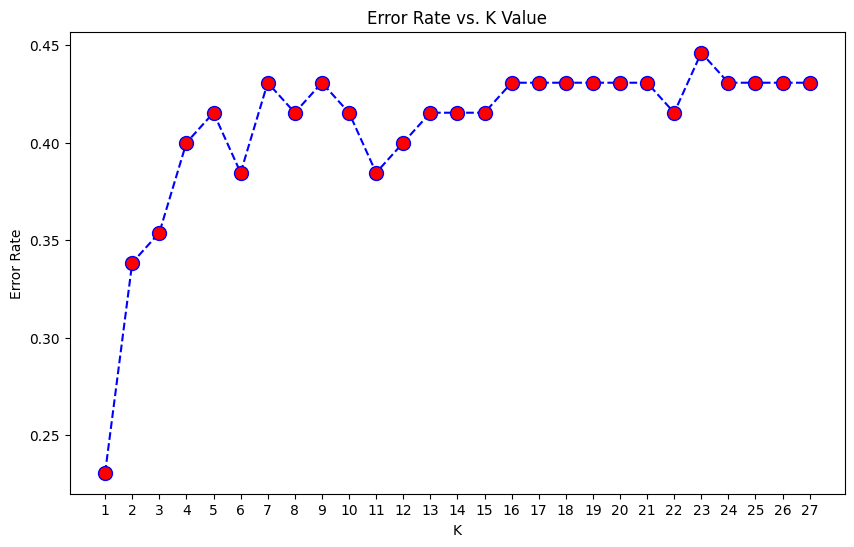

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,j),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xticks(range(1,j))
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [23]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train[['Na', 'Mg', 'Al', 'Si', 'K', 'Ca']], y_train.values.ravel())

KNeighborsClassifier(n_neighbors=1)

In [26]:
y_pred4 = knn_model.predict(X_test[['Na', 'Mg', 'Al', 'Si', 'K', 'Ca']])

In [28]:
print('KNN Model metrics')
print('accuracy_score:  ', accuracy_score(y_pred=y_pred4,y_true=y_test.values.ravel()))
print(classification_report(y_test,y_pred4))

KNN Model metrics
accuracy_score:   0.7692307692307693
              precision    recall  f1-score   support

           1       0.79      0.79      0.79        19
           2       0.84      0.70      0.76        23
           3       0.60      0.75      0.67         4
           5       0.83      0.83      0.83         6
           6       0.33      0.67      0.44         3
           7       0.90      0.90      0.90        10

    accuracy                           0.77        65
   macro avg       0.72      0.77      0.73        65
weighted avg       0.80      0.77      0.78        65

